<center><h1> Traffic Sign Detection and Recognition</h1></center>
<center><h3>Approach</h3></center>

---

## Importing necessary libraries

This cell imports the required libraries for image processing, visualization, and data analysis:

- `cv2` (OpenCV): For image processing tasks like reading, resizing, and color conversions.
- `numpy`: For numerical operations and array handling.
- `matplotlib.pyplot`: For creating visualizations.
- `seaborn`: For enhancing visualizations.
- `zipfile`: For handling zip archives.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Downloading the dataset

This cell downloads the traffic sign dataset (TrainIJCNN2013.zip) from a specified URL using `wget`.

In [ ]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip

--2024-12-16 09:13:55--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104177081 (1.0G) [application/zip]
Saving to: ‘TrainIJCNN2013.zip’

TrainIJCNN2013.zip  100%[===================>]   1.03G  17.1MB/s    in 44s     

2024-12-16 09:14:41 (23.7 MB/s) - ‘TrainIJCNN2013.zip’ saved [1104177081/1104177081]



## Extracting the dataset

This cell extracts the downloaded zip file to the `/content` directory using the `zipfile` library.

In [ ]:
zip_file_path = "/content/TrainIJCNN2013.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content")
    print(f"Extracted all files")

## Loading and visualizing an image

This cell loads a sample image from the dataset using `cv2.imread`, converts it to RGB color space, and displays it using `matplotlib.pyplot`. It also prints the image shape and dimensions.

(800, 1360, 3)


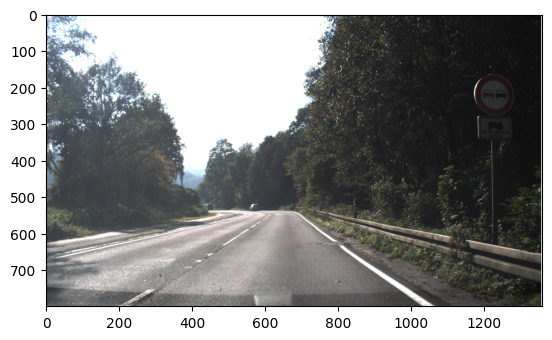

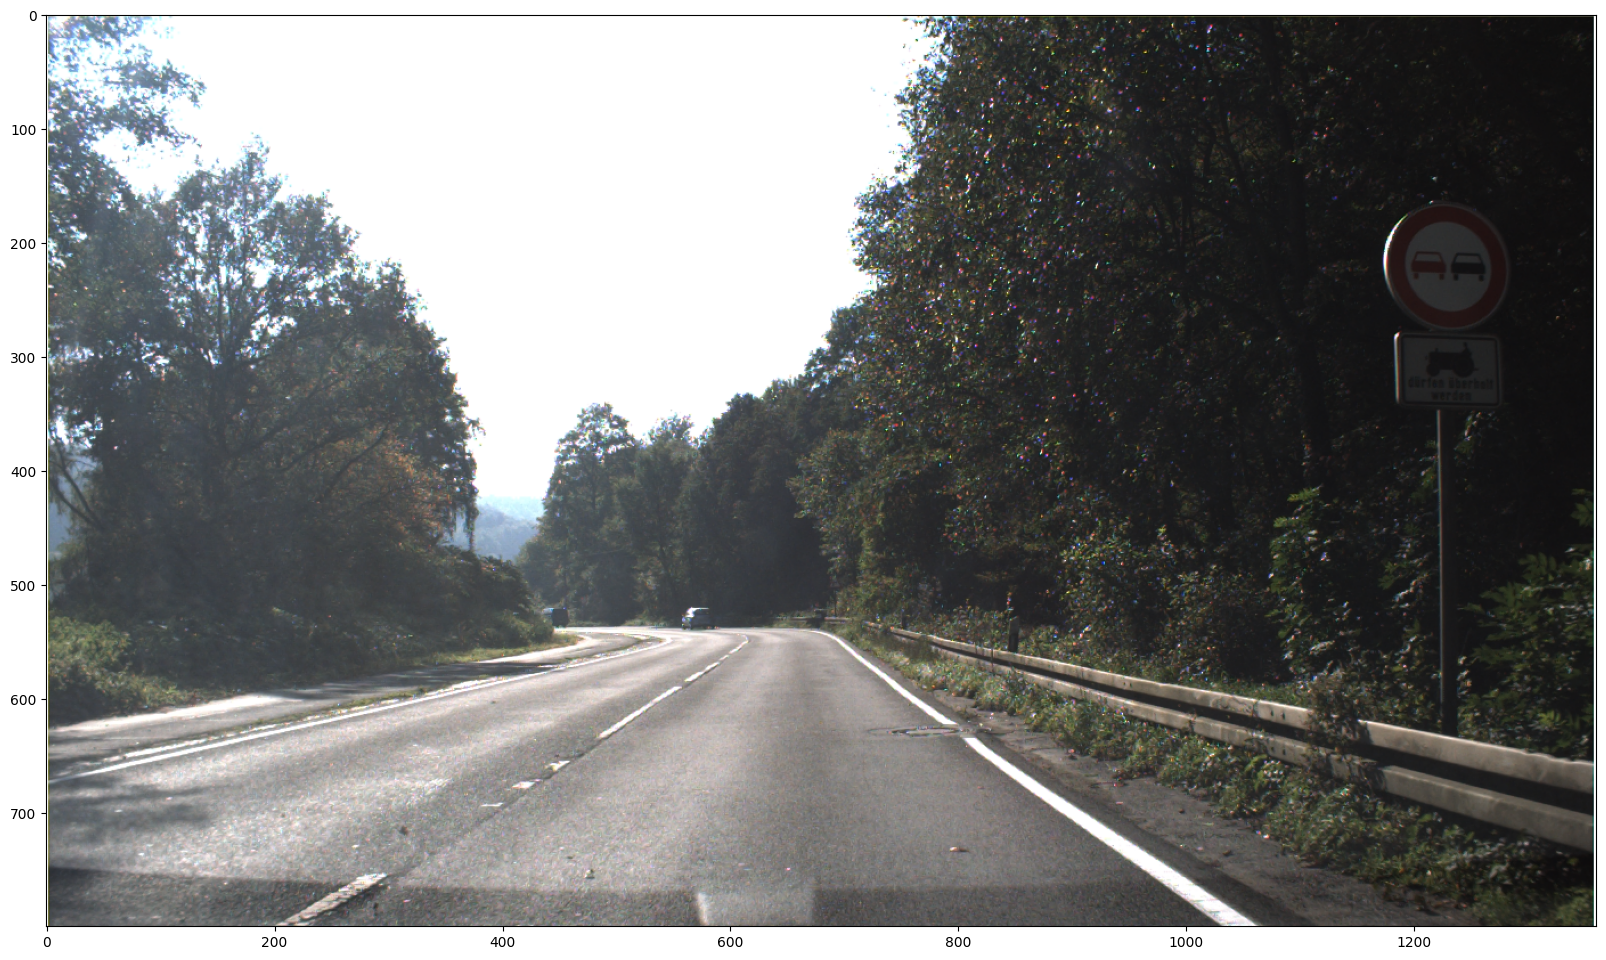

In [ ]:
im = cv.imread("/content/TrainIJCNN2013/00005.ppm")

print(im.shape)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)
H=im.shape[0]
W=im.shape[1]
plt.figure(figsize=(20,20))
plt.imshow(im)

## Converting to HSV color space

This cell converts the image to the HSV color space using `cv2.cvtColor` and displays it using `matplotlib.pyplot`.

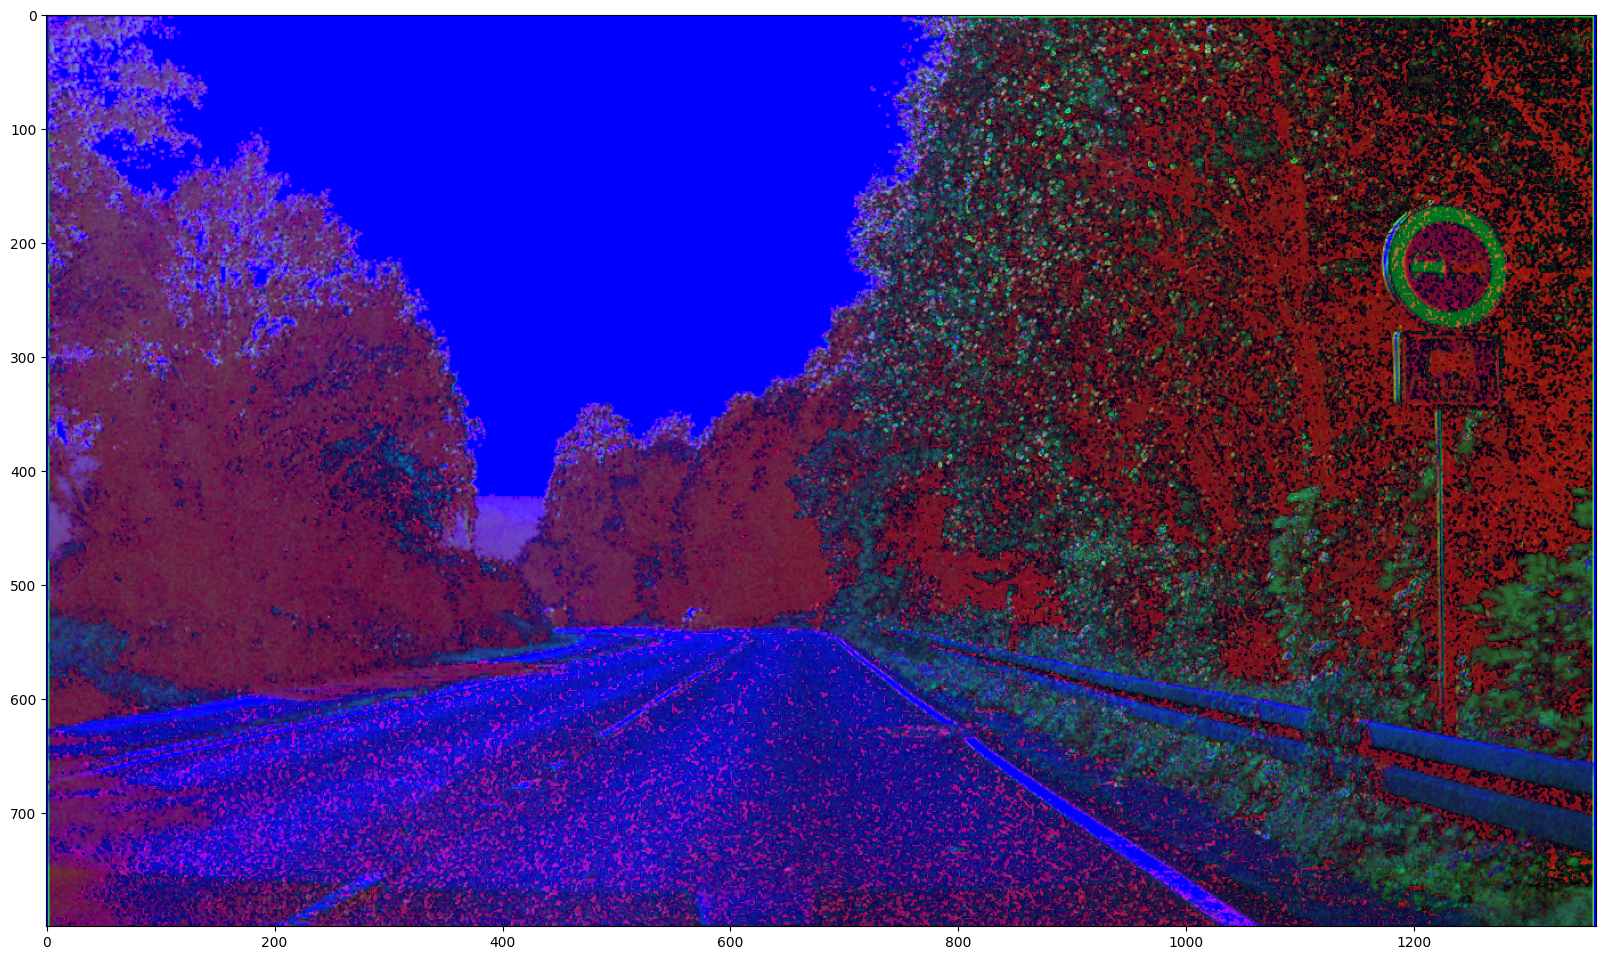

In [ ]:
HSV=cv.cvtColor(im,cv.COLOR_RGB2HSV)
plt.figure(figsize=(20,20))
plt.imshow(HSV)

## Color thresholding

This cell applies color thresholding to isolate red and blue regions in the HSV image. It uses `cv2.inRange` to create binary masks and `cv2.bitwise_or` to combine them. The resulting binary image is displayed.

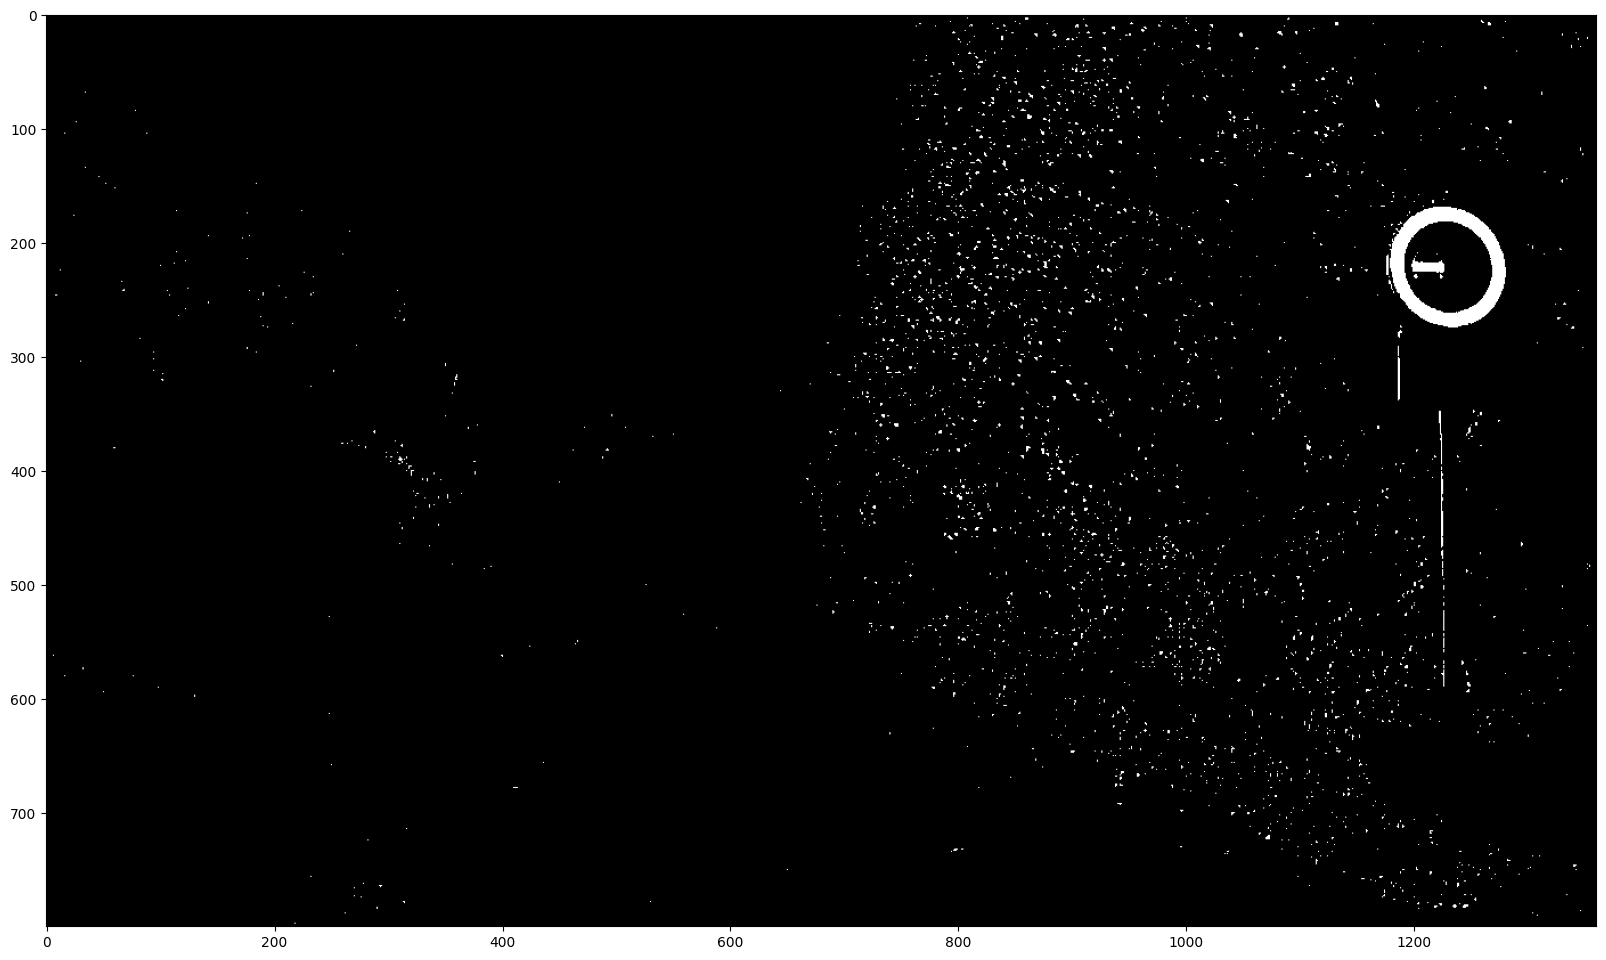

In [ ]:
bin1=cv.inRange(HSV,(0,80,0),(12,255,255))
bin2=cv.inRange(HSV,(168,80,0),(180,255,255))
bin=cv.bitwise_or(bin1,bin2)
plt.figure(figsize=(20,20))
plt.imshow(bin,cmap="gray")

## Noise reduction and dilation

This cell applies median blur to reduce noise in the binary image using `cv2.medianBlur`. Then, it performs dilation using `cv2.dilate` to enlarge and connect the sign regions. The processed image is displayed.

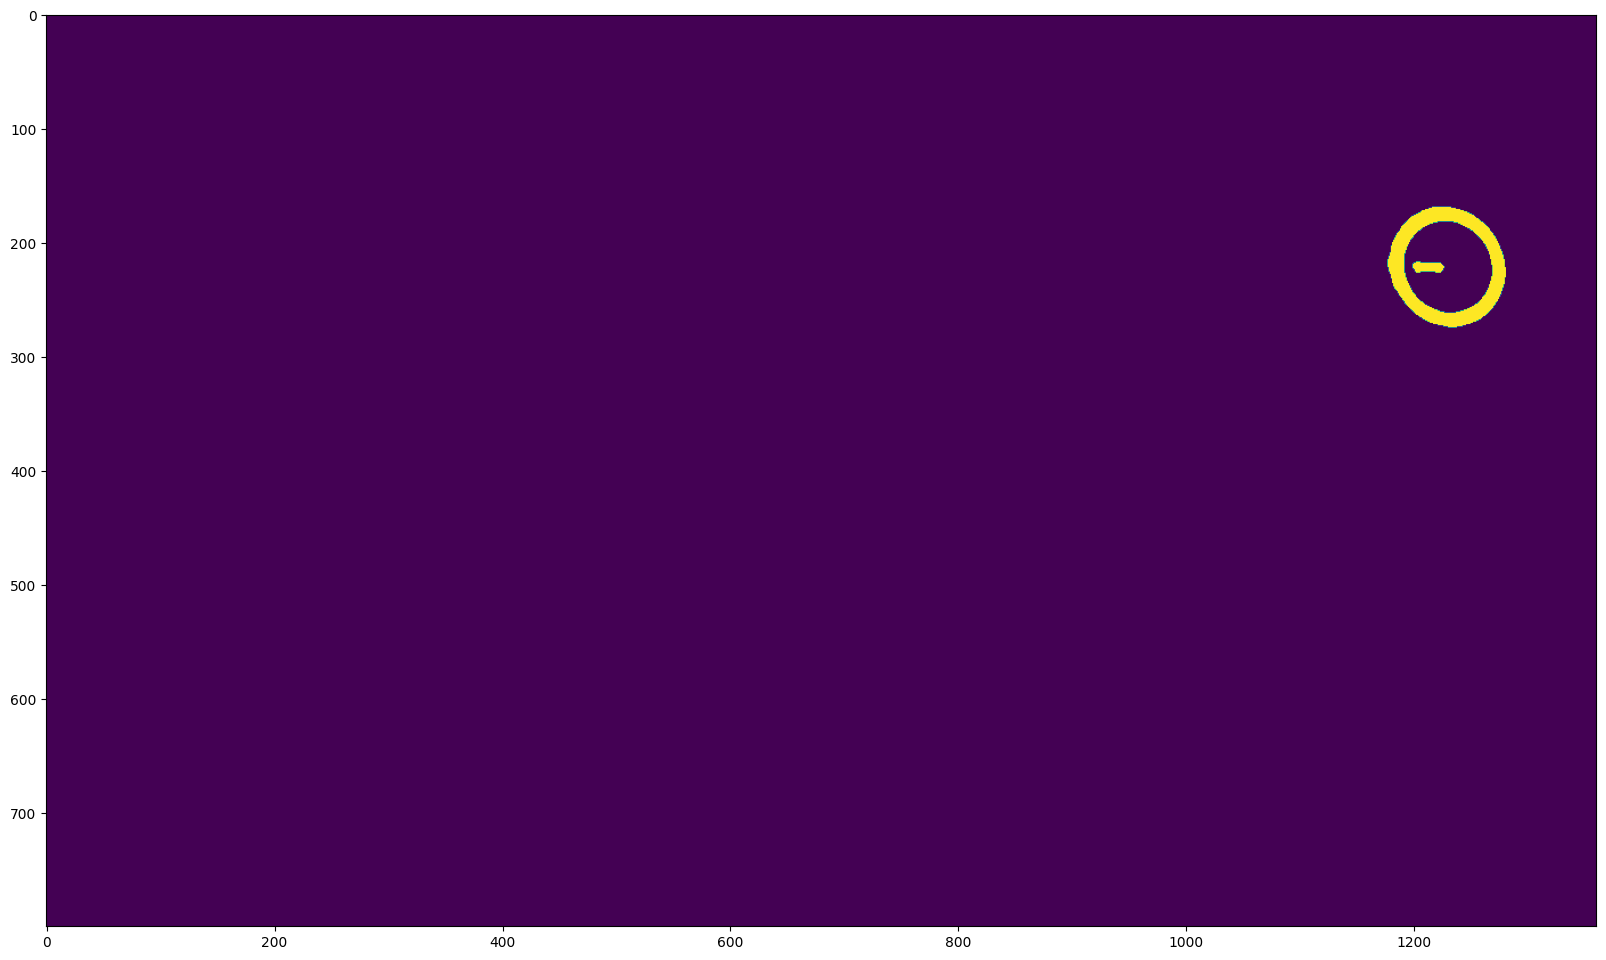

In [ ]:
dst=cv.medianBlur(bin,9)
kernel=np.ones((5,5),np.uint8)
dilate_dst=cv.dilate(dst,kernel)
plt.figure(figsize=(20,20))
plt.imshow(dst)

## Contour detection and ROI extraction

This cell detects contours in the dilated image using `cv2.findContours`. It filters contours based on size and aspect ratio to identify potential sign regions. The selected regions are extracted as ROIs and resized to a uniform size. The first ROI is displayed.

Number of contours: 1


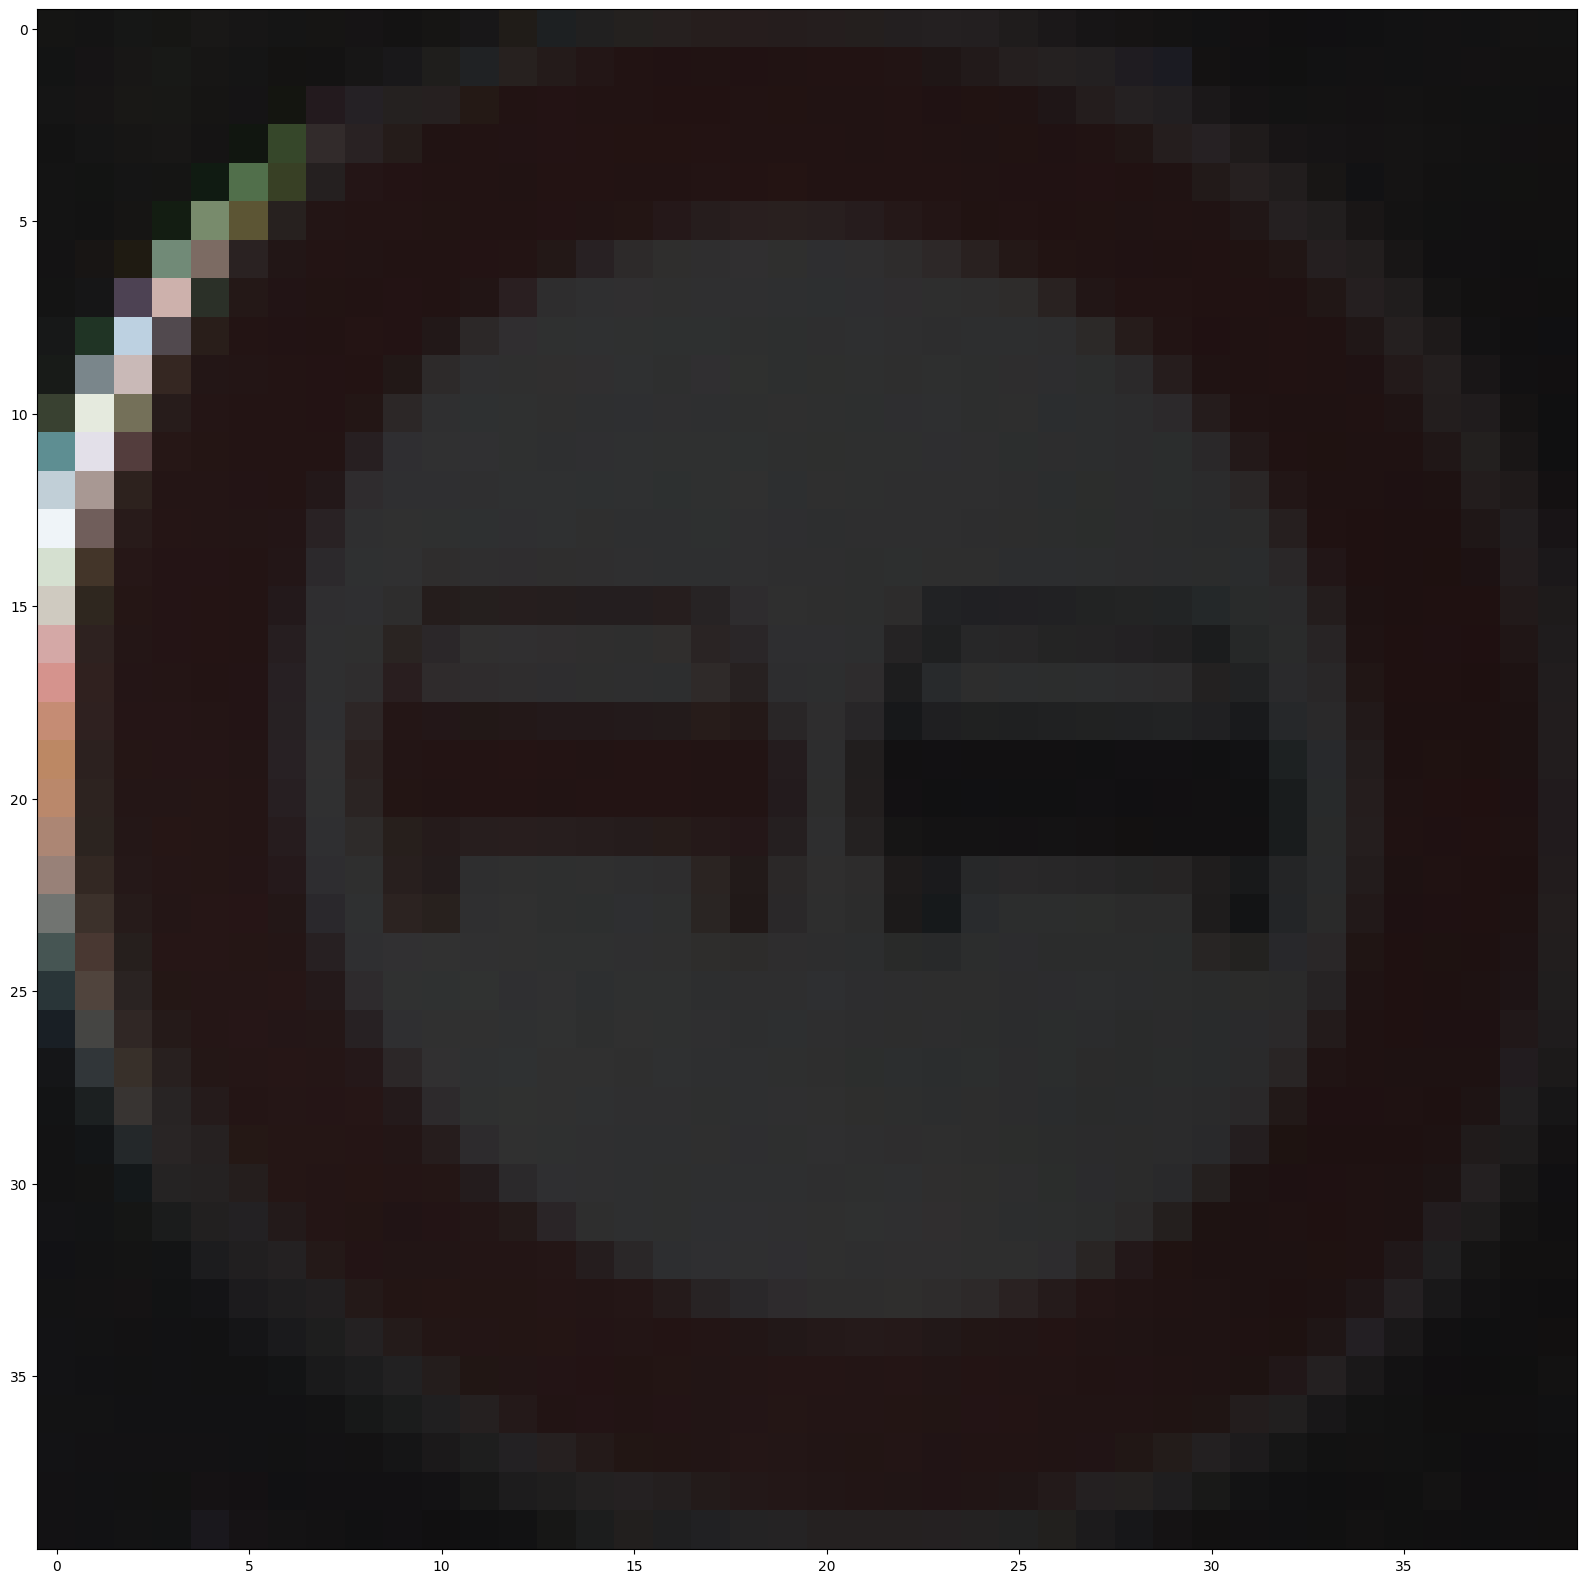

In [ ]:
contours, _ = cv.findContours(dilate_dst, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
Rois=[]
React=[]
print("Number of contours: "+str(len(contours)))
for c in contours:
  x,y,w,h = cv.boundingRect(c)
  if h>H/35 and w>W/35 and h<H/3 and w<W/3:
    roi = im[y:y+h,x:x+w]
    resized = cv.resize(roi, (40, 40), interpolation = cv.INTER_AREA)
    Rois.append(resized)
    React.append(cv.boundingRect(c))
  plt.figure(figsize=(20,20))
  plt.imshow(Rois[0])

## Image Classification with CNN

This cell loads and preprocesses image data for classification using a Convolutional Neural Network (CNN). It resizes the images, normalizes pixel values, and one-hot encodes the labels. The dataset is split into training and test sets. A CNN model is built with convolutional and pooling layers to learn image features, followed by dense layers for classification. The model is trained on the training set, evaluated on the test set, and its performance is visualized through accuracy plots.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.0546 - loss: 3.7269 - val_accuracy: 0.0876 - val_loss: 3.3561
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0474 - loss: 3.4768 - val_accuracy: 0.0949 - val_loss: 3.3503
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0572 - loss: 3.4093 - val_accuracy: 0.0803 - val_loss: 3.3109
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0849 - loss: 3.3900 - val_accuracy: 0.0803 - val_loss: 3.3477
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0527 - loss: 3.4129 - val_accuracy: 0.0584 - val_loss: 3.2898
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0874 - loss: 3.3553 - val_accuracy: 0.0584 - val_loss: 3.3171
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0677 - loss: 3.3839 - val_accuracy: 0.0803 - val_loss: 3.3205
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0680 - loss: 3.3776 - val_accuracy: 0.0584 - val_los

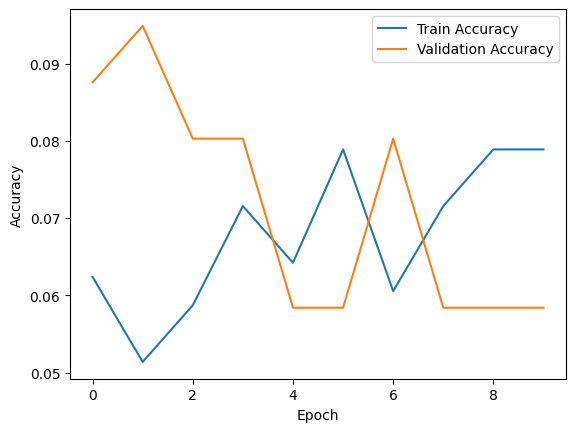

In [ ]:
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import os

# Function to load and preprocess the images
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                image = io.imread(image_path)
                image = transform.resize(image, (40, 40), mode='reflect', anti_aliasing=True)
                images.append(image)
                labels.append(int(label))
    return np.array(images), np.array(labels)

# Load data
data_dir = '/content/TrainIJCNN2013'  # Replace with your directory
images, labels = load_and_preprocess_data(data_dir)

# Normalize image data
images = images.astype('float32') / 255.0

# Convert labels to categorical
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(labels.shape[1], activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optional: Visualize training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Visualizing predictions

This cell visualizes the first N test images with their predicted and actual labels to demonstrate the performance of the trained SVM classifier.

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


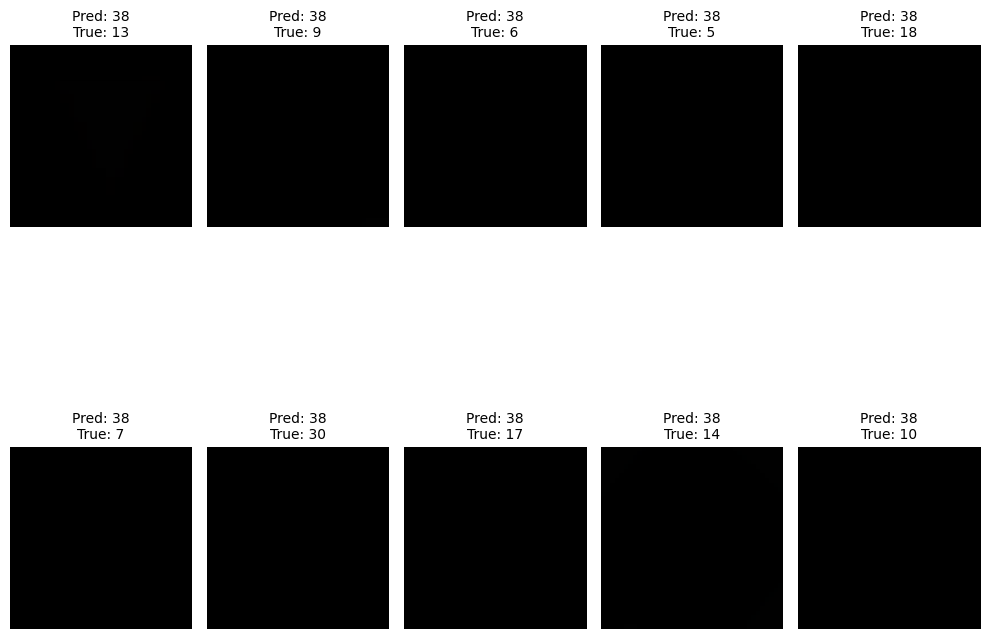

In [ ]:
# Visualize the first N test images with their predicted and actual labels
N = 10  # Number of images to display
predictions = model.predict(X_test)  # Get predictions for the test set
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

plt.figure(figsize=(10, 10))
for i in range(N):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])  # Images are in RGB
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()